# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [3]:
csv_2020 = pd.read_csv('2020_Accidents_UK.csv',index_col=0)
csv_2020.head()

C:\Users\maial\AppData\Local\Temp\ipykernel_21412\916471428.py:1: DtypeWarning: Columns (0,2,20) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_2020 = pd.read_csv('2020_Accidents_UK.csv',index_col=0)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,1,...,unknown (self reported),Daylight,NaN,unknown (self reported),None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,2,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003034
2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01004726
2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,1,...,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003617
2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004763


In [4]:
csv_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91199 entries, 2020010219808 to 2020991032575
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_year                                91199 non-null  int64  
 1   accident_reference                           91199 non-null  object 
 2   location_easting_osgr                        91185 non-null  float64
 3   location_northing_osgr                       91185 non-null  float64
 4   longitude                                    91185 non-null  float64
 5   latitude                                     91185 non-null  float64
 6   police_force                                 91199 non-null  object 
 7   accident_severity                            91199 non-null  object 
 8   number_of_vehicles                           91199 non-null  int64  
 9   number_of_casualties                         91199 non-nu

In [5]:
csv_2020["special_conditions_at_site"]

accident_index
2020010219808    None
2020010220496    None
2020010228005    None
2020010228006    None
2020010228011    None
                 ... 
2020991027064    None
2020991029573    None
2020991030297    None
2020991030900    None
2020991032575    None
Name: special_conditions_at_site, Length: 91199, dtype: object

In [6]:
#Q1-how many accidents at each light condition ?
LC_count = csv_2020['light_conditions'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


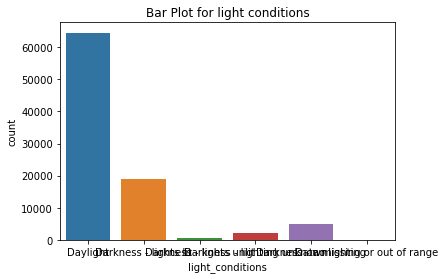

In [7]:
#Q1-visualization
sns.countplot('light_conditions',data=csv_2020)
plt.title('Bar Plot for light conditions')
plt.show()

In [8]:
#Q2-what is the number of casualties at each light condition ?
counts = csv_2020.groupby(['light_conditions'])['number_of_casualties'].sum() #returns a series of each age and the corresponding number of individuals who survived
print(counts)

light_conditions
Darkness - lighting unknown      2556
Darkness - lights lit           24227
Darkness - lights unlit           843
Darkness - no lighting           6970
Data missing or out of range        1
Daylight                        80987
Name: number_of_casualties, dtype: int64


C:\Users\maial\AppData\Local\Temp\ipykernel_21412\503261132.py:6: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


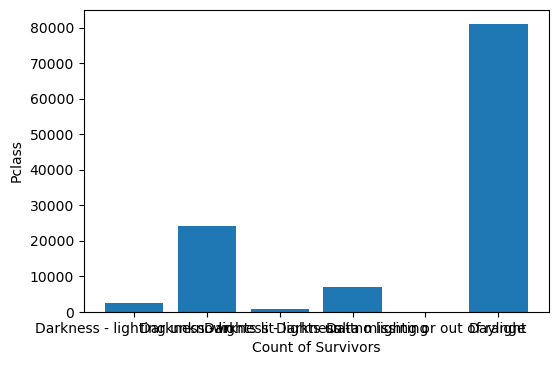

In [9]:
#Q2-visualization
fig, axs = plt.subplots(1,1,dpi=100)
axs.set_ylabel('Pclass')
axs.set_xlabel('Count of Survivors')
bar_chart = plt.bar(counts.index, counts)#switch x and y when you create barh
plt.locator_params(integer=True)

In [10]:
#Q3-What is the number of vehicles associated with each road surface condition ?
counts = csv_2020.groupby(['road_surface_conditions'])['number_of_vehicles'].sum() #returns a series of each age and the corresponding number of individuals who survived
print(counts)

road_surface_conditions
Data missing or out of range       552
Dry                             116429
Flood over 3cm. deep               266
Frost or ice                      1213
Snow                               260
Wet or damp                      47180
unknown (self reported)           1475
Name: number_of_vehicles, dtype: int64


C:\Users\maial\AppData\Local\Temp\ipykernel_21412\2427542207.py:6: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


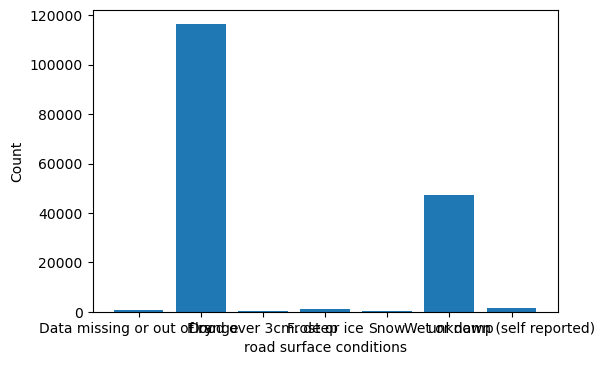

In [11]:
#Q3-visualization
fig, axs = plt.subplots(1,1,dpi=100)
axs.set_ylabel('Count')
axs.set_xlabel('road surface conditions')
bar_chart = plt.bar(counts.index, counts)#switch x and y when you create barh
plt.locator_params(integer=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


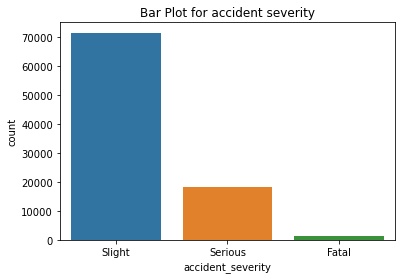

In [12]:
#Q4-How many accidents at each severity level ?
sns.countplot('accident_severity',data=csv_2020)
plt.title('Bar Plot for accident severity')
plt.show()

# 2- EDA

# 3 - Cleaning Data

## Observing Missing and duplicate Data

In [13]:
sum_null = csv_2020.isnull().sum()
perc_null = csv_2020.isnull().mean()*100
sum_null,perc_null

(accident_year                                      0
 accident_reference                                 0
 location_easting_osgr                             14
 location_northing_osgr                            14
 longitude                                         14
 latitude                                          14
 police_force                                       0
 accident_severity                                  0
 number_of_vehicles                                 0
 number_of_casualties                               0
 date                                               0
 day_of_week                                        0
 time                                               0
 local_authority_district                           0
 local_authority_ons_district                       0
 local_authority_highway                            0
 first_road_class                                   0
 first_road_number                                  0
 road_type                  

In [14]:
csv_2020["road_surface_conditions"].unique()
csv_2020["special_conditions_at_site"].unique()

array(['None', 'unknown (self reported)', 'Auto signal part defective',
       'Roadworks', 'Road surface defective', 'Auto traffic signal - out',
       'Road sign or marking defective or obscured', 'Oil or diesel',
       'Mud', 'Data missing or out of range'], dtype=object)

In [15]:
var_2020 = pd.read_csv('2020_Accidents_UK.csv',index_col=0)

C:\Users\maial\AppData\Local\Temp\ipykernel_21412\4059055932.py:1: DtypeWarning: Columns (0,2,20) have mixed types. Specify dtype option on import or set low_memory=False.
  var_2020 = pd.read_csv('2020_Accidents_UK.csv',index_col=0)


In [16]:
var_2020.replace('NA', np.nan, inplace=True)
var_2020.replace('Missing', np.nan, inplace=True)
var_2020.replace('None', np.nan, inplace=True)
var_2020.replace('Unclassified', np.nan, inplace=True)
var_2020.replace('unknown (self reported)', np.nan, inplace=True)
var_2020.replace('Data missing or out of range', np.nan, inplace=True)
var_2020.replace('first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', np.nan, inplace=True)

In [17]:
sum_null = var_2020.isnull().sum()
perc_null = var_2020.isnull().mean()*100
sum_null,perc_null

(accident_year                                      0
 accident_reference                                 0
 location_easting_osgr                             14
 location_northing_osgr                            14
 longitude                                         14
 latitude                                          14
 police_force                                       0
 accident_severity                                  0
 number_of_vehicles                                 0
 number_of_casualties                               0
 date                                               0
 day_of_week                                        0
 time                                               0
 local_authority_district                           0
 local_authority_ons_district                       0
 local_authority_highway                            0
 first_road_class                               31709
 first_road_number                              36524
 road_type                  

In [18]:
var_2020.accident_reference.duplicated().sum()

0

In [19]:
var_2020["junction_control"].value_counts()

Give way or uncontrolled    39998
Auto traffic signal         10407
Stop sign                     583
Authorised person             377
Name: junction_control, dtype: int64

In [20]:
var_2020["first_road_number"].unique()

array([nan, '3036', '11', ..., '7003', '6404', '9057'], dtype=object)

In [21]:
var_2020["road_type"].value_counts()

Single carriageway    66929
Dual carriageway      13206
Roundabout             5580
One way street         1966
Slip road              1512
Name: road_type, dtype: int64

In [22]:
var_2020["junction_detail"].value_counts()

Not at junction or within 20 metres    37978
T or staggered junction                25626
Crossroads                              8429
Roundabout                              7326
Other junction                          4705
Private drive or entrance               1887
Mini-roundabout                         1300
More than 4 arms (not roundabout)       1279
Slip road                               1159
Name: junction_detail, dtype: int64

In [23]:
var_2020["weather_conditions"].value_counts()

Fine no high winds       70729
Raining no high winds    11583
Other                     2629
Raining + high winds      1665
Fine + high winds         1401
Fog or mist                510
Snowing no high winds      185
Snowing + high winds        73
Name: weather_conditions, dtype: int64

In [24]:
var_2020["speed_limit"] = var_2020["speed_limit"].astype(float)

In [25]:
var_2020["road_surface_conditions"].value_counts()

Dry                     62698
Wet or damp             26240
Frost or ice              764
Flood over 3cm. deep      184
Snow                      150
Name: road_surface_conditions, dtype: int64

In [26]:
var_2020["pedestrian_crossing_human_control"].value_counts()

None within 50 metres                 86358
Control by other authorised person      980
Control by school crossing patrol       386
Name: pedestrian_crossing_human_control, dtype: int64

In [27]:
var_2020["pedestrian_crossing_physical_facilities"].value_counts()

No physical crossing facilities within 50 metres                             69269
Pedestrian phase at traffic signal junction                                   7465
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     4903
Zebra                                                                         3836
Central refuge                                                                2460
Footbridge or subway                                                           199
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [28]:
var_2020["trunk_road_flag"].value_counts()

Non-trunk                                    79222
Trunk (Roads managed by Highways England)     5267
Name: trunk_road_flag, dtype: int64

## Handling Missing data

In [29]:
var_2020 = var_2020.dropna(axis='index', how='all', subset=['location_easting_osgr', 'location_northing_osgr','longitude','latitude'])
var_2020

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,1,...,NaN,Daylight,NaN,NaN,NaN,NaN,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,2,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01003034
2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,NaN,NaN,Urban,Yes,Non-trunk,E01004726
2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,1,...,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01003617
2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,NaN,NaN,Urban,Yes,Non-trunk,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,Police Scotland,Serious,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,NaN,NaN,Urban,Yes,NaN,-1
2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,Police Scotland,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,NaN,NaN,Urban,No,NaN,-1
2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,Police Scotland,Serious,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,NaN,NaN,Rural,Yes,NaN,-1


In [30]:
#Dropping the coloumns with less than 40000 non-null rows
#I think the data is MCAR as there is no relation between any other coloumn or even with coloumn values.
var_2020 = var_2020.dropna(axis='columns', thresh=40000)
var_2020

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,1,...,Not at junction or within 20 metres,NaN,NaN,Daylight,NaN,NaN,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,2,...,NaN,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003034
2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,1,...,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Urban,Yes,Non-trunk,E01004726
2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,1,...,Not at junction or within 20 metres,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003617
2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,2,...,C,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,Police Scotland,Serious,2,1,...,B,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes,NaN,-1
2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,Police Scotland,Slight,1,1,...,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,No,NaN,-1
2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,Police Scotland,Serious,2,1,...,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Rural,Yes,NaN,-1


In [31]:
var_2020['junction_control'].replace(np.nan, 'Give way or uncontrolled',inplace=True)

C:\Users\maial\AppData\Local\Temp\ipykernel_21412\326617700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['junction_control'].replace(np.nan, 'Give way or uncontrolled',inplace=True)


In [32]:
sum_null = var_2020.isnull().sum()
perc_null = var_2020.isnull().mean()*100
sum_null,perc_null

(accident_year                                      0
 accident_reference                                 0
 location_easting_osgr                              0
 location_northing_osgr                             0
 longitude                                          0
 latitude                                           0
 police_force                                       0
 accident_severity                                  0
 number_of_vehicles                                 0
 number_of_casualties                               0
 date                                               0
 day_of_week                                        0
 time                                               0
 local_authority_district                           0
 local_authority_ons_district                       0
 local_authority_highway                            0
 first_road_class                               31704
 first_road_number                              36519
 road_type                  

In [33]:
#MCAR
#Dropping coloumns because there is not any suitable way to fill them, as they had over 35% empty rows
del var_2020["first_road_class"]
del var_2020["first_road_number"]
del var_2020["second_road_class"]
var_2020

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,1,...,Give way or uncontrolled,NaN,NaN,Daylight,NaN,NaN,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,2,...,Auto traffic signal,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003034
2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,1,...,Authorised person,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Urban,Yes,Non-trunk,E01004726
2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,1,...,Give way or uncontrolled,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003617
2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,2,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,Police Scotland,Serious,2,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes,NaN,-1
2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,Police Scotland,Slight,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,No,NaN,-1
2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,Police Scotland,Serious,2,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Rural,Yes,NaN,-1


In [34]:
sum_null = var_2020.isnull().sum()
perc_null = var_2020.isnull().mean()*100
sum_null,perc_null

(accident_year                                     0
 accident_reference                                0
 location_easting_osgr                             0
 location_northing_osgr                            0
 longitude                                         0
 latitude                                          0
 police_force                                      0
 accident_severity                                 0
 number_of_vehicles                                0
 number_of_casualties                              0
 date                                              0
 day_of_week                                       0
 time                                              0
 local_authority_district                          0
 local_authority_ons_district                      0
 local_authority_highway                           0
 road_type                                      2005
 speed_limit                                      12
 junction_detail                              

In [35]:
var_2020

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,Metropolitan Police,Slight,1,1,...,Give way or uncontrolled,NaN,NaN,Daylight,NaN,NaN,Urban,No - accident was reported using a self comple...,Non-trunk,E01004576
2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,Metropolitan Police,Slight,1,2,...,Auto traffic signal,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003034
2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,Metropolitan Police,Slight,1,1,...,Authorised person,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Urban,Yes,Non-trunk,E01004726
2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,Metropolitan Police,Serious,1,1,...,Give way or uncontrolled,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003617
2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,Metropolitan Police,Slight,1,2,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,Police Scotland,Serious,2,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes,NaN,-1
2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,Police Scotland,Slight,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,No,NaN,-1
2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,Police Scotland,Serious,2,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Rural,Yes,NaN,-1


In [36]:
var_2020['road_type'].replace(np.nan,'Single carriageway',inplace=True)
var_2020['junction_detail'].replace(np.nan,'Not at junction or within 20 metres',inplace=True)
var_2020['weather_conditions'].replace(np.nan,'Fine no high winds',inplace=True)
var_2020['road_surface_conditions'].replace(np.nan,'Dry',inplace=True)
var_2020['pedestrian_crossing_human_control'].replace(np.nan,'None within 50 metres',inplace=True)
var_2020['pedestrian_crossing_physical_facilities'].replace(np.nan,'No physical crossing facilities within 50 metres',inplace=True)
var_2020['trunk_road_flag'].replace(np.nan,'Non-trunk',inplace=True)

C:\Users\maial\AppData\Local\Temp\ipykernel_21412\1060138714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['road_type'].replace(np.nan,'Single carriageway',inplace=True)
C:\Users\maial\AppData\Local\Temp\ipykernel_21412\1060138714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['junction_detail'].replace(np.nan,'Not at junction or within 20 metres',inplace=True)
C:\Users\maial\AppData\Local\Temp\ipykernel_21412\1060138714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [37]:
sum_null = var_2020.isnull().sum()
perc_null = var_2020.isnull().mean()*100
sum_null,perc_null

(accident_year                                   0
 accident_reference                              0
 location_easting_osgr                           0
 location_northing_osgr                          0
 longitude                                       0
 latitude                                        0
 police_force                                    0
 accident_severity                               0
 number_of_vehicles                              0
 number_of_casualties                            0
 date                                            0
 day_of_week                                     0
 time                                            0
 local_authority_district                        0
 local_authority_ons_district                    0
 local_authority_highway                         0
 road_type                                       0
 speed_limit                                    12
 junction_detail                                 0
 junction_control              

## Findings and conclusions

## Observing outliers

In [38]:
#There is no non-sense outliers present in the dataset
var_2020.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,91185.0,91185.000000,9.118500e+04,91185.000000,91185.000000,91185.000000,91185.000000,91173.000000
mean,2020.0,456487.876416,2.737645e+05,-1.189258,52.351073,1.835258,1.267390,36.273458
std,0.0,93512.711807,1.473516e+05,1.367786,1.327573,0.677299,0.681506,13.889947
min,2020.0,65947.000000,1.271500e+04,-7.497375,49.970479,1.000000,1.000000,20.000000
25%,2020.0,392890.000000,1.745690e+05,-2.107789,51.457237,1.000000,1.000000,30.000000
50%,2020.0,465545.000000,2.085990e+05,-1.046912,51.763385,2.000000,1.000000,30.000000
75%,2020.0,530168.000000,3.783660e+05,-0.125238,53.297386,2.000000,1.000000,40.000000
max,2020.0,655138.000000,1.184351e+06,1.756257,60.541144,13.000000,41.000000,70.000000


In [39]:
var_2020.speed_limit.skew()

1.1509819239284778

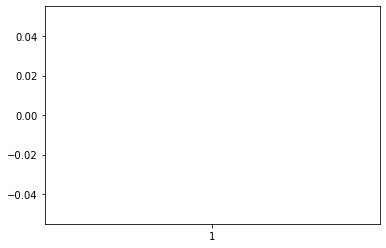

In [40]:
plt.boxplot(var_2020.speed_limit)
plt.show()

In [41]:
#High numbers are logical in such coloumn, as there might be an accident where alot of vehicles were included.
var_2020.number_of_casualties.skew()

5.837342295242573

In [42]:
csv_2020['number_of_casualties'].value_counts()

1     74161
2     12221
3      3214
4      1063
5       349
6       115
7        43
8        14
9         7
11        4
10        3
17        1
41        1
13        1
12        1
19        1
Name: number_of_casualties, dtype: int64

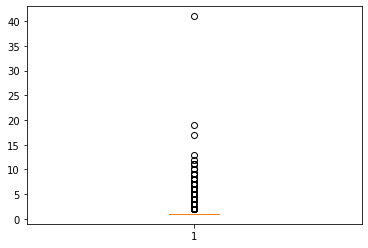

In [43]:
plt.boxplot(var_2020.number_of_casualties)
plt.show()

In [44]:
var_2020.number_of_vehicles.skew()

1.518049400034268

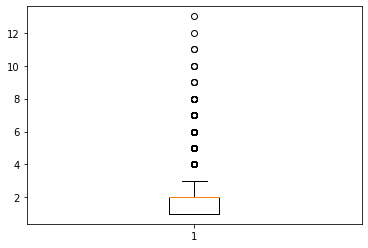

In [45]:
plt.boxplot(var_2020.number_of_vehicles)
plt.show()

In [46]:
var_2020.latitude.skew()

1.178717505865813

In [47]:
var_2020.longitude.skew()

-0.6049187826910906

In [48]:
var_2020.location_northing_osgr	.skew()

1.1872155112573821

In [49]:
var_2020.location_easting_osgr	.skew()

-0.5775405016978625

## Handling outliers

## Findings and conclusions

# 4 - Data transformation

## 4.1 - Discretization

In [50]:
var_2020['date'] = pd.to_datetime(var_2020['date'])


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2020' in DD/MM/YYYY format. Provide format or specif

In [51]:
var_2020['date']

accident_index
2020010219808   2020-04-02
2020010220496   2020-04-27
2020010228005   2020-01-01
2020010228006   2020-01-01
2020010228011   2020-01-01
                   ...    
2020991027064   2020-12-08
2020991029573   2020-11-13
2020991030297   2020-04-15
2020991030900   2020-12-15
2020991032575   2020-08-25
Name: date, Length: 91185, dtype: datetime64[ns]

In [52]:
var_2020.sort_values(by= 'date', ascending=True, inplace=True)


C:\Users\maial\AppData\Local\Temp\ipykernel_21412\3808451458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020.sort_values(by= 'date', ascending=True, inplace=True)


In [53]:
var_2020['Week_Number'] = var_2020['date'].dt.isocalendar().week


C:\Users\maial\AppData\Local\Temp\ipykernel_21412\1877907230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['Week_Number'] = var_2020['date'].dt.isocalendar().week


## 4.11 - Findings and conclusions

## 4.2 - Encoding

In [54]:
unique = var_2020['trunk_road_flag'].unique()

In [55]:
var=var_2020.trunk_road_flag

In [56]:
var_2020.drop('trunk_road_flag',axis='columns')

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,Week_Number
accident_index,,,,,,,,,,,,,,,,,,,,,
2020200927366,2020,200927366,410726.0,295176.0,-1.843226,52.554337,West Midlands,Slight,2,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,Urban,Yes,E01009468,1
2020990915011,2020,990915011,278851.0,655053.0,-3.932852,55.773581,Police Scotland,Fatal,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Urban,Yes,-1,1
202006K166954,2020,06K166954,371881.0,409073.0,-2.426143,53.577509,Greater Manchester,Serious,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,No,E01004817,1
2020137110784,2020,137110784,440199.0,416726.0,-1.393385,53.645522,West Yorkshire,Slight,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Rural,Yes,E01011766,1
2020010931381,2020,010931381,533681.0,180745.0,-0.075042,51.509829,Metropolitan Police,Slight,2,1,...,Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,Urban,No,E01004293,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020520101405,2020,520101405,361001.0,143348.0,-2.559408,51.188012,Avon and Somerset,Slight,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Frost or ice,Urban,Yes,E01029065,53
2020010287152,2020,010287152,539020.0,171064.0,-0.001960,51.421546,Metropolitan Police,Slight,2,1,...,Give way or uncontrolled,None within 50 metres,Central refuge,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,E01003235,53
202063C087220,2020,63C087220,192630.0,213000.0,-5.007429,51.777161,Dyfed-Powys,Slight,1,1,...,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Frost or ice,Rural,Yes,W01000575,53


In [57]:
# One-hot encoding makes sense for such a coloumn as there is only two values.
var_2020.join(pd.get_dummies(var))

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_Number,Non-trunk,Trunk (Roads managed by Highways England)
accident_index,,,,,,,,,,,,,,,,,,,,,
2020200927366,2020,200927366,410726.0,295176.0,-1.843226,52.554337,West Midlands,Slight,2,1,...,Daylight,Other,Dry,Urban,Yes,Non-trunk,E01009468,1,1,0
2020990915011,2020,990915011,278851.0,655053.0,-3.932852,55.773581,Police Scotland,Fatal,1,1,...,Darkness - lights lit,Fine no high winds,Wet or damp,Urban,Yes,Non-trunk,-1,1,1,0
202006K166954,2020,06K166954,371881.0,409073.0,-2.426143,53.577509,Greater Manchester,Serious,1,1,...,Darkness - lights lit,Fine no high winds,Dry,Urban,No,Non-trunk,E01004817,1,1,0
2020137110784,2020,137110784,440199.0,416726.0,-1.393385,53.645522,West Yorkshire,Slight,1,1,...,Darkness - lights lit,Fine no high winds,Wet or damp,Rural,Yes,Non-trunk,E01011766,1,1,0
2020010931381,2020,010931381,533681.0,180745.0,-0.075042,51.509829,Metropolitan Police,Slight,2,1,...,Darkness - lights lit,Fine no high winds,Dry,Urban,No,Non-trunk,E01004293,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020520101405,2020,520101405,361001.0,143348.0,-2.559408,51.188012,Avon and Somerset,Slight,1,1,...,Darkness - no lighting,Fine no high winds,Frost or ice,Urban,Yes,Non-trunk,E01029065,53,1,0
2020010287152,2020,010287152,539020.0,171064.0,-0.001960,51.421546,Metropolitan Police,Slight,2,1,...,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,Non-trunk,E01003235,53,1,0
202063C087220,2020,63C087220,192630.0,213000.0,-5.007429,51.777161,Dyfed-Powys,Slight,1,1,...,Daylight,Other,Frost or ice,Rural,Yes,Non-trunk,W01000575,53,1,0


In [58]:
#Label encoding was used for accident severity for a better machine readable form.
#The more severe the accident the lower the value.
var_2020['accident_severity'] = LabelEncoder().fit_transform(var_2020['accident_severity'])


C:\Users\maial\AppData\Local\Temp\ipykernel_21412\2177904129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['accident_severity'] = LabelEncoder().fit_transform(var_2020['accident_severity'])


## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

In [59]:
#Most of the numeric coloumns where already evenly distributed.

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

In [60]:
var_2020['IsWeekend']=var_2020["day_of_week"] == "Friday"
var_2020['IsWeekend']=var_2020["day_of_week"] == "Saturday"

C:\Users\maial\AppData\Local\Temp\ipykernel_21412\1211421418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['IsWeekend']=var_2020["day_of_week"] == "Friday"
C:\Users\maial\AppData\Local\Temp\ipykernel_21412\1211421418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['IsWeekend']=var_2020["day_of_week"] == "Saturday"


In [61]:
var_2020['day_of_week'].unique()

array(['Wednesday', 'Saturday', 'Sunday', 'Friday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [62]:
var_2020['IsFatal']=var_2020["accident_severity"] == "0"

C:\Users\maial\AppData\Local\Temp\ipykernel_21412\2979223191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_2020['IsFatal']=var_2020["accident_severity"] == "0"


In [63]:
var_2020['accident_severity']

accident_index
2020200927366    2
2020990915011    0
202006K166954    1
2020137110784    2
2020010931381    2
                ..
2020520101405    2
2020010287152    2
202063C087220    2
2020010287188    1
2020552100001    2
Name: accident_severity, Length: 91185, dtype: int32

## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

In [64]:
csv_2020 = pd.read_csv('file.csv',index_col=0)
csv_2020.head()

,Unnamed: 1
Accidents Severity,
Fatal,0
Serious,1
Slight,2


## 5- Exporting the dataframe to a csv file or parquet

In [65]:
var_2020.to_csv(r'C:\Users\maial\OneDrive\Desktop\DataEngineering\M1\export_dataframe.csv', index=False, header=True)
